In [2]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from functions import *
from optimizers import *
from applications import *
from projectors import *
# import accbpg
# from accbpg import *

### Quadratic

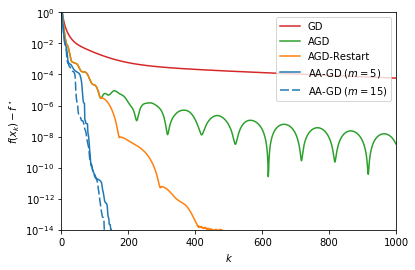

In [4]:

f, x0, L2, fopt = quadratic(n=100, r=25, condidtion_number=1e3, noise=0.0)

h = SquaredL2Norm()

max_iters = 1000
max_runtime = 300
depth = 5
depth_ = 15
reg = 1e-15

xs, Fx, Tx = gradient_descent(x0, max_iters, 1./L2, f, max_runtime=max_runtime)

xs_nes, Fx_nes, x_nes = accelerated_proximal_descent(x0, max_iters, 1./L2, f, max_runtime=max_runtime)
xs_nes_restart, Fx_nes_restart, Tx_nes_restart = accelerated_proximal_descent(x0, max_iters, 1./L2, f, restart=True, max_runtime=max_runtime)

xs_aa, Fx_aa, Tx_aa = AA_BPG(x0, max_iters, depth, h, f, 1./L2, reg=reg, max_runtime=max_runtime)
xs_aa_, Fx_aa_, Tx_aa_ = AA_BPG(x0, max_iters, depth_, h, f, 1./L2, reg=reg, max_runtime=max_runtime)

optval = fopt

fig1 = plt.figure()
plt.plot(range(len(Fx)), [f - optval for f in Fx], c='#d62728', label='GD')
plt.plot(range(len(Fx_nes)), [f - optval for f in Fx_nes], c='#2ca02c', label='AGD')
plt.plot(range(len(Fx_nes_restart)), [f - optval for f in Fx_nes_restart], c='#ff7f0e', label='AGD-Restart')
plt.plot(range(len(Fx_aa)), [f - optval for f in Fx_aa], c='#1f77b4', label='AA-GD ($m=5$)')
plt.plot(range(len(Fx_aa_)), [f - optval for f in Fx_aa_], dashes=[6, 2], c='#1f77b4', label='AA-GD ($m=15$)')

plt.xlabel("$k$")
plt.ylabel("$f(x_k)-f^\star$")
plt.yscale('log')
plt.legend()
plt.axis([0, 1000, 1e-14, 1e0])
plt.legend(loc='upper right')


### Data sets used in the paper

The data sets Madelon and Gisette  are downloaded from: http://archive.ics.uci.edu/ml/datasets.php.

The data sets Cina0 and Sido0  are downloaded from: http://www.causality.inf.ethz.ch

### Logistic regression with box constraints

In [ ]:
A, b = load_svmlight_file("data/madelon")
A = A.toarray()

## For cina0 and sido0, use the following:

# train_data = 'data/cina0.data'
# train_labels = 'data/cina0.targets'
# A = pd.read_csv(train_data, delimiter=' ', header=None)
# A = A.drop(A.shape[1]-1, axis = 1)
# b = pd.read_csv(train_labels, delimiter=' ', header=None)
# m, n = A.shape
# A = A.values
# b = b.values
# b = b.reshape(m,)

# # Load problem data
f, h, L2, x0 = logistic_regression_Linf(A, b, lambdaL2=0.1)

max_iters = 1000
max_runtime = 5
depth = 5
reg = 1e-10

xs, Fx, Tx = gradient_descent(x0, 2*max_iters, 1./L2, f, box_projection, max_runtime=max_runtime)
xs_ls, Fx_ls, Tx_ls = gradient_descent(x0, 2*max_iters, 1./L2, f,
                                       proj=box_projection, max_step=10./L2, linesearch=True, max_runtime=max_runtime)

xs_nes, Fx_nes, Tx_nes = accelerated_proximal_descent(x0, 2*max_iters, 1/L2, f, box_projection, max_runtime=max_runtime)
xs_aa, Fx_aa, Tx_aa = AA_BPG(x0, max_iters, depth, h, f, 1./L2, reg=reg, max_runtime=max_runtime)

optval = min(Fx_aa.min(), Fx_nes.min(), Fx_ls.min())

fig1 = plt.figure()
plt.plot(range(len(Fx)), [f - optval for f in Fx], c='#d62728', label='PGA')
plt.plot(range(len(Fx_ls)), [f-optval for f in Fx_ls], c='#ff7f0e', label='PGA-LS')
plt.plot(range(len(Fx_nes)), [f-optval for f in Fx_nes], c='#2ca02c', label='APGA')
plt.plot(range(len(Fx_aa)), [f - optval for f in Fx_aa], c='#1f77b4', label='AA-PGA')

plt.xlabel("Iteration")
plt.ylabel("Error")
plt.yscale('log')
plt.legend()

fig2 = plt.figure()
plt.plot(Tx, [f - optval for f in Fx], c='#d62728', label='PGA')
plt.plot(Tx_ls, [f-optval for f in Fx_ls], c='#ff7f0e', label='PGA-LS')
plt.plot(Tx_nes, [f-optval for f in Fx_nes], c='#2ca02c', label='APGA')
plt.plot(Tx_aa, [f - optval for f in Fx_aa], c='#1f77b4', label='AA-PGA')

plt.xlabel("Time [s]")
plt.ylabel("Error")
plt.yscale('log')
plt.legend()
plt.show()


### Nonnegative least squares

In [ ]:
train_data = 'data/sido0.data'
train_labels = 'data/sido0.targets'
A = pd.read_csv(train_data, delimiter=' ', header=None)
A = A.drop(A.shape[1]-1, axis = 1)
b = pd.read_csv(train_labels, delimiter=' ', header=None)
m, n = A.shape
A = A.values
b = b.values
b = b.reshape(m,)

# Least-Squares
f, h, L2, x0 = nonnegative_least_squares(A, b, lambdaL2=0.1)

max_iters = 300
max_runtime = 300
depth = 5
reg = 1e-10

xs, Fx, Tx = gradient_descent(x0, max_iters, 1./L2, f, nonneg_projection, max_runtime=max_runtime)
xs_ls, Fx_ls, Tx_ls = gradient_descent(x0, max_iters, 1./L2, f, proj=nonneg_projection,
                                       max_step=10./L2, linesearch=True, max_runtime=max_runtime)

xs_nes, Fx_nes, Tx_nes = accelerated_proximal_descent(x0, max_iters, 1./L2, f, nonneg_projection, max_runtime=max_runtime)
xs_aa, Fx_aa, Tx_aa = AA_BPG(x0, max_iters, depth, h, f, 1./L2, reg=reg, max_runtime=max_runtime)

optval = min(Fx_aa.min(), Fx_nes.min(), Fx_ls.min())

fig1 = plt.figure()
plt.plot(range(len(Fx)), [f - optval for f in Fx], c='#d62728', label='PGA')
plt.plot(range(len(Fx_ls)), [f - optval for f in Fx_ls], c='#ff7f0e', label='PGA-LS')
plt.plot(range(len(Fx_nes)), [f - optval for f in Fx_nes], c='#2ca02c', label='APGA')
plt.plot(range(len(Fx_aa)), [f - optval for f in Fx_aa], c='#1f77b4', label='AA-PGA')

plt.xlabel("Iteration")
plt.ylabel("Error")
plt.yscale('log')
plt.legend()
plt.axis([0, 300, 1e-15, 1e-3])

fig2 = plt.figure()
plt.plot(Tx, [f - optval for f in Fx], c='#d62728', label='PGA')
plt.plot(Tx_ls, [f-optval for f in Fx_ls], c='#ff7f0e', label='PGA-LS')
plt.plot(Tx_nes, [f-optval for f in Fx_nes], c='#2ca02c', label='APGA')
plt.plot(Tx_aa, [f - optval for f in Fx_aa], c='#1f77b4', label='AA-PGA')

plt.xlabel("Time [s]")
plt.ylabel("Error")
plt.yscale('log')
plt.legend()


### KL Nonnegetive Regression

To run this experiment, you need to download the implementation of the Bregman Proximal Gradient family from:

https://github.com/Microsoft/accbpg,

and uncomnent the last two lines in the first cell of this notebook.


[0, 1.6, 1e-14, 1.0]

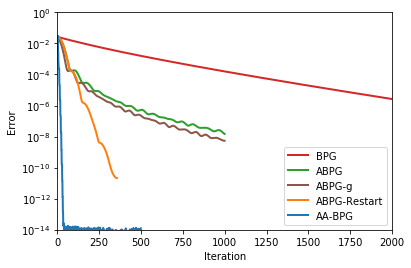

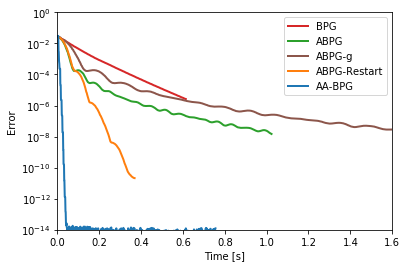

In [2]:
randomseed = 1 #random seed used to generate figures in the paper

# the hard case
m, n = 100, 1000
l1_reg = 0.001     
gamma = 2

# Input for BPG family
f, h, L, x0 = KL_nonneg_regr(m, n, noise=0.001, lamdaL1=l1_reg, randseed=randomseed)

x0 =np.ones(n)

# Input for Anderson acceleration
kernel = ShannonEntropyl1(l1_reg)

max_iters = 500
depth = 5
reg = 1e-10 


xs_bpg, Fx_bpg, Tx_bpg = BPG(f, h, L, x0, maxitrs=4*max_iters, verbose=False, verbskip=100, stop_eps=0.)

xs_abpg, Fx_abpg, Tx_abpg, _  = ABPG(f, h, L, gamma, x0, maxitrs=2*max_iters, theta_eq=False, restart=False,
         verbose=False, verbskip=100, stop_eps=0.)

xs_abpg_g, Fx_abpg_g, Tx_abpg_g, _, _ = ABPG_gain(f, h, L, gamma, x0, maxitrs=2*max_iters, G0=1,
              ls_increment=1.2, ls_decrement=1.2, ls_adapt=True,
              theta_eq=True, checkdiv=False, restart=False,
              verbose=False, verbskip=100, stop_eps=0.)

xs_abpg_restart, Fx_abpg_restart, Tx_abpg_restart, _  = ABPG(f, h, L, gamma, x0, maxitrs=max_iters, theta_eq=False, 
                                                             restart=True, verbose=False, verbskip=100, stop_eps=0.)

xs_aa, Fx_aa, Tx_aa = AA_BPG(x0, max_iters, depth, kernel, f, 1./L, reg=reg, verbose=False, verbskip=100)


optval = min(Fx_bpg.min(), Fx_abpg.min(), Fx_abpg_restart.min(), Fx_aa.min())

fig1 = plt.figure()
plt.plot(range(len(Fx_bpg)), [f - optval for f in Fx_bpg], c='#d62728', label='BPG', linewidth=2)
plt.plot(range(len(Fx_abpg)), [f - optval for f in Fx_abpg], c='#2ca02c', label='ABPG', linewidth=2)
plt.plot(range(len(Fx_abpg_g)), [f - optval for f in Fx_abpg_g], c='#8c564b', label='ABPG-g', linewidth=2)
plt.plot(range(len(Fx_abpg_restart)), [f - optval for f in Fx_abpg_restart], c='#ff7f0e', label='ABPG-Restart', linewidth=2)
plt.plot(range(len(Fx_aa)), [f - optval for f in Fx_aa], c='#1f77b4', label='AA-BPG', linewidth=2)

plt.xlabel("Iteration")
plt.ylabel("Error")
plt.yscale('log')
plt.legend()
plt.axis([0, 2000, 1e-14, 1e0])

fig2 = plt.figure()

plt.plot(Tx_bpg, [f - optval for f in Fx_bpg], c='#d62728', label='BPG', linewidth=2)
plt.plot(Tx_abpg, [f - optval for f in Fx_abpg], c='#2ca02c', label='ABPG', linewidth=2)
plt.plot(Tx_abpg_g, [f - optval for f in Fx_abpg_g], c='#8c564b', label='ABPG-g', linewidth=2)
plt.plot(Tx_abpg_restart, [f - optval for f in Fx_abpg_restart], c='#ff7f0e', label='ABPG-Restart', linewidth=2)
plt.plot(Tx_aa, [f - optval for f in Fx_aa], c='#1f77b4', label='AA-BPG', linewidth=2)

plt.xlabel("Time [s]")
plt.ylabel("Error")
plt.yscale('log')
plt.legend()
plt.axis([0, 1.6, 1e-14, 1e0])